In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv ('Final_Data_w_Colors.csv')
pd.set_option('display.max_columns', None)
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'background_image','name', 'total_reviews','owners'])

In [3]:
df2 = pd.get_dummies(df, drop_first=True)

In [4]:
# Binning the review_score, it will be the target of our machine learning.
# The idea is we are seeing what features of our games dataset: Genre, Boxart, Release Month, etc. could help predict how well recieved the game is.
bins = [-0.1,.60,.70,.80,.90,1]
group_names = ['1','2','3','4','5']
df2['target'] = pd.cut(df2['review_score'], bins, labels = group_names)
df2 = df2.drop(columns=['review_score'])

In [5]:
df.head(3)

,genre_action,genre_adventure,genre_arcade,genre_board games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively multiplayer,genre_platformer,genre_puzzle,genre_rpg,genre_racing,genre_shooter,genre_simulation,genre_sports,genre_strategy,tag_local multiplayer,tag_fantasy,tag_violent,tag_free to play,tag_anime,tag_online multiplayer,tag_great soundtrack,tag_split screen,tag_pixel graphics,tag_story rich,tag_vr,tag_co-op,tag_horror,tag_atmospheric,tag_early access,tag_partial controller support,tag_2d,tag_multiplayer,tag_full controller support,tag_steam cloud,tag_singleplayer,platform_3do,platform_atari,platform_commodore / amiga,platform_sega,platform_neo geo,platform_web,platform_linux,platform_android,platform_nintendo,platform_apple macintosh,platform_ios,platform_xbox,platform_playstation,platform_pc,esrb_rating.id,price,review_score,released_month,Color 1,Color 2,Color 3,Color 4,Color 5
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,999,0.955977,10,Orange/Yellow/Brown,Orange/Yellow/Brown,Orange/Yellow/Brown,Black,Orange/Yellow/Brown
1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1499,0.949042,3,Orange/Yellow/Brown,Orange/Yellow/Brown,Orange/Yellow/Brown,Orange/Yellow/Brown,Orange/Yellow/Brown
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1999,0.825258,2,Black,Orange/Yellow/Brown,Black,Orange/Yellow/Brown,Orange/Yellow/Brown


In [6]:
# Splitting out the target to get X and Y data
X = df2.drop('target', axis=1)
y = df2['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# One hot encoding our target variable for machine learning.
num_classes = 6
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 100, num = 5)]
max_depth.append(None)
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [0, 25, 50, 75, 100, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [100, 200, 300, 400, 500]}


In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 2 fold cross validation, 
# search across 50 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train_scaled, y_train)

# n_iter is the number of interations we try
#cv is the number of cross validation folds we will try, to reduce chances of overfitting.

Fitting 2 folds for each of 100 candidates, totalling 200 fits


C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
34 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 25, 50, 75, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [18]:
clf_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 75,
 'bootstrap': False}

In [20]:
clf_best = RandomForestClassifier(n_estimators = 100, max_depth=75, max_features='sqrt', bootstrap=False).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_best.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_best.score(X_test_scaled, y_test)}')

Training Score: 0.9994441665277083
Testing Score: 0.04818272757585862


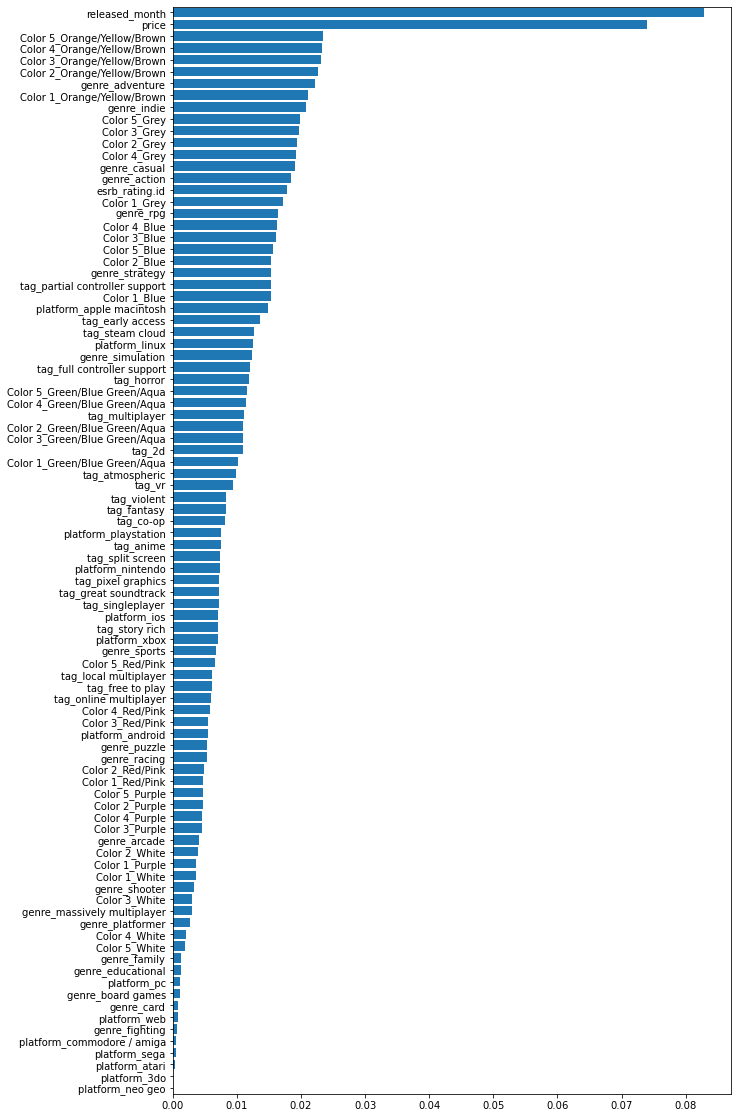

In [21]:
feature_importances = clf_best.feature_importances_

features = sorted(zip(X.columns, clf_best.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [22]:
sel = SelectFromModel(clf_best)
sel.fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [23]:
logistic = LogisticRegression()
logistic.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {logistic.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {logistic.score(X_selected_test_scaled, y_test)}')

Training Score: 0.32494024790172865
Testing Score: 0.3211070356785595


In [32]:
df_columns = df2.columns.tolist()
df_columns.remove('target')
low_value_columns = []
for column in df_columns: 
    if df2[column].sum() <= 500:
        low_value_columns.append(column)
print(low_value_columns)

['genre_board games', 'genre_card', 'genre_educational', 'genre_family', 'genre_fighting', 'genre_platformer', 'platform_3do', 'platform_atari', 'platform_commodore / amiga', 'platform_sega', 'platform_neo geo', 'platform_web', 'Color 1_White', 'Color 2_White', 'Color 3_White', 'Color 4_White', 'Color 5_White']


In [33]:
df_value = df2.drop(columns=low_value_columns)

In [34]:
# Splitting out the target to get X and Y data
X = df_value.drop('target', axis=1)
y = df_value['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encoding our target variable for machine learning.
num_classes = 6
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [36]:
import tensorflow as tf
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=75)) 

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=75, activation="relu")) 

# Output layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="softmax")) 

# Check the structure of the model
nn_model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               15200     
                                                                 
 dense_4 (Dense)             (None, 75)                15075     
                                                                 
 dense_5 (Dense)             (None, 6)                 456       
                                                                 
Total params: 30,731
Trainable params: 30,731
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [38]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 1.5494 - accuracy: 0.3205
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 1.4855 - accuracy: 0.3556
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 1.4525 - accuracy: 0.3763
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 1.4206 - accuracy: 0.3971
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 1.3827 - accuracy: 0.4219
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 1.3429 - accuracy: 0.4399
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 1.2977 - accuracy: 0.4645
Epoch 8/100
563/563 [==============================] - 1s 1ms/step - loss: 1.2509 - accuracy: 0.4925
Epoch 9/100
563/563 [==============================] - 1s 1ms/step - loss: 1.2044 - accuracy: 0.5118
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 1.1569 - accura

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

188/188 - 0s - loss: 9.5986 - accuracy: 0.2653 - 392ms/epoch - 2ms/step
Loss: 9.598600387573242, Accuracy: 0.2652550935745239
